In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('../lib/VAD-Humbug'))
sys.path.insert(0, os.path.abspath('../lib/VAD-Humbug'))
sys.path.insert(0, os.path.abspath('../lib'))
import os
# if not os.getcwd().endswith('VAD-Humbug'):
#   os.chdir('../lib/VAD-Humbug')
from VAD_pipeline import VAD_pipeline
import matplotlib.pyplot as plt

import pickle
import util
import librosa
import numpy as np
import soundfile as sf
import ipdb

C:\Users\ikiskin\AppData\Local\conda\conda\envs\tf-gpu\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
C:\Users\ikiskin\AppData\Local\conda\conda\envs\tf-gpu\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


# VAD

# Load model for detection

In [2]:
# with open('../models/clf_CDC_mfcc-cut20.pickle', 'rb') as handle:
#     clf = pickle.load(handle)

In [3]:
from tensorflow import keras
model = keras.models.load_model('../models/BNN/Win_40_Stride_5_CNN_log-mel_128_norm_Falseheld_out_test_manual_v2_low_epoch.h5',
                               custom_objects={"dropout": 0.2})
model_name = 'held_out_test_manual_v2_low_epoch'
win_size=40
step_size=40
feat_type='log-mel'
n_feat=128

C:\Users\ikiskin\AppData\Local\conda\conda\envs\tf-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ikiskin\AppData\Local\conda\conda\envs\tf-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ikiskin\AppData\Local\conda\conda\envs\tf-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ikiskin

In [4]:
def get_wav_for_path(noise_path_names, sr):
    x = []
    signal_length = 0
    for path in noise_path_names:
        print(path)
        signal, _ = librosa.load(path, sr=sr)
        x.append(signal)
        signal_length += len(signal)/sr
    return x, signal_length

R4_cleaned recording_17-10-17.wav
D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/Culex_for_ogg//R4_cleaned recording_17-10-17.wav
[['28.16', '30.72', '0.70 PE: 0.88 MI: 0.23'], ['38.4', '43.52', '0.81 PE: 0.58 MI: 0.25'], ['51.2', '53.76', '0.58 PE: 0.98 MI: 0.30'], ['58.88', '66.56', '0.79 PE: 0.62 MI: 0.28'], ['74.24', '76.8', '0.98 PE: 0.13 MI: 0.04'], ['81.92', '87.04', '0.65 PE: 0.94 MI: 0.18'], ['89.6', '92.16', '0.82 PE: 0.68 MI: 0.21'], ['94.72', '99.84', '0.72 PE: 0.69 MI: 0.17'], ['102.4', '107.52', '0.99 PE: 0.04 MI: 0.01'], ['110.08', '112.64', '0.96 PE: 0.24 MI: 0.03'], ['117.76', '125.44', '0.96 PE: 0.16 MI: 0.03'], ['130.56', '145.92', '0.93 PE: 0.26 MI: 0.14'], ['148.48', '156.16', '0.98 PE: 0.09 MI: 0.03'], ['161.28', '163.84', '0.80 PE: 0.73 MI: 0.21'], ['166.4', '171.52', '1.00 PE: 0.00 MI: 0.00'], ['174.08', '194.56', '0.97 PE: 0.15 MI: 0.10'], ['197.12', '202.24', '0.87 PE: 0.53 MI: 0.10'], ['215.04', '220.16', '0.61 PE: 0.95 MI: 0.37'],

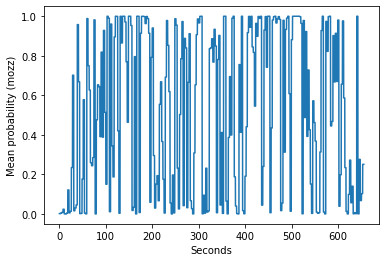

In [9]:
# Latest version from detector_testing_full

# raw = [r'D:\Postdoc\Data\Semi Field Data\UK bednet trial\PHONE A\2020-09-08_19.04.55.928__v0.wav']
# filtered = [r'D:\Postdoc\MozzDetectorTestingSQL\Code\notebooks\proc_data\VADout\2020-09-08_19.04.55.928__v0.wav']
# TzA = [r'D:\Postdoc\MozzDetectorTestingSQL\Code\notebooks\proc_data\VADout\TanzaniaBednetOctober\01-10-2020\B2\2020-10-01_18.44.21.802__v3.wav']
# TzAraw = [r'D:\Postdoc\Data\Semi Field Data\TanzaniaBednetOctober\01-10-2020\B2\2020-10-01_18.44.21.802__v3.wav']
# # Confirmed noise (Dav):
dav_noise = [r'D:\Postdoc\MozzDetectorTestingSQL\Data\Experiments\sounds\noise0.wav',
             r'D:\Postdoc\MozzDetectorTestingSQL\Data\Experiments\sounds\noise1.wav',
             r'D:\Postdoc\MozzDetectorTestingSQL\Data\Experiments\sounds\noise2.wav', 
             r'D:\Postdoc\MozzDetectorTestingSQL\Data\Experiments\sounds\noise3.wav',
             r'D:\Postdoc\MozzDetectorTestingSQL\Data\Experiments\sounds\noise4.wav',
             r'D:\Postdoc\MozzDetectorTestingSQL\Data\Experiments\sounds\noise5.wav', 
             r'D:\Postdoc\MozzDetectorTestingSQL\Data\Experiments\sounds\noise6.wav']




sr = 8000

# Tanzania
# directory = 'D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/VADout/Semi Field Data/TanzaniaBednetOctober/02-10-2020/'
# subdirectories = ['A1', 'A2', 'A3', 'A4', 'B1', 'B2', 'B3', 'B4', 'C1', 'C2', 'C3', 'C4']

directory = 'D:/Postdoc/Data/Semi Field Data/TanzaniaBednetOctober/2020-10-15 - 2020-10-16/'
# directory = 'D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/VADout/Semi Field Data/TanzaniaBednetOctober/2020-10-15 - 2020-10-16/'
subdirectories = ['A1', 'B1']
dir_out = 'D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/Semi Field Data/TanzaniaBednetOctober/2020-10-15 - 2020-10-16/'

# # # subdirectories = ['A1']
directory = 'D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/Culex_for_ogg/'
dir_out = 'D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/Culex_for_ogg/'

subdirectories = ['']


# # UK bednet
# directory = 'D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/VADout/Semi Field Data/UK bednet trial/'
# subdirectories = ['PHONE A','PHONE B']
# dir_out = 'D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/Classifierout/VADout/Semi Field Data/UK bednet trial/'


# Thai
# directory = 'D:/Postdoc/MozzDetectorTestingSQL/Data/Thai/'
# subdirectories = ['sounds']
# dir_out = 'D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/Classifierout/Thai/'

# directory  = 'D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/music/'
# subdirectories = ['']
# dir_out = directory
# directory = 'F:\Music\Guitar Playthroughs\Audacity'



# directory = 'D:/Postdoc/Data/OneDrive_2020-11-30/IFAKARA - NOVEMBER 2020 BEDNET PHONE DOWNLOADS/9to10-11-20/C1/2020-11-10/'
# subdirectories = ['0000', '0100', '0200', '0300', '0400', '0500']
# dir_out = 'D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/IFAKARA - NOVEMBER 2020 BEDNET PHONE DOWNLOADS/9to10-11-20/C1/'

#CNN:
to_filter = False
norm = False
step_size= 40
BNN = True
n_samples = 10

if norm:
    mean= np.load('mean_norm.npy')
    std = np.load('std_norm.npy')
else:
    mean = 0
    std = 1

for subdir in subdirectories:
    listdirectory = os.listdir(directory + subdir) # gets the name of all files in your dir
    for filename in listdirectory: 
        if filename.endswith(".wav"): # check each of the files for whether or not they end in .wav:
            print(filename)
            x, x_l = get_wav_for_path([directory + subdir + '/' + filename], sr =8000)
#             print(np.shape(x))
#             X = util.get_feat(x, sr=8000, feat_type=feat_type, flatten = flatten, n_feat=n_feat)
            X_CNN = util.get_feat(x, sr=8000, feat_type=feat_type, n_feat=n_feat, flatten = False)
    
            X_CNN = util.reshape_feat(X_CNN, win_size=win_size, step_size=step_size)
#             X_CNN = (X_CNN - mean)/std
#             print(np.shape(X_CNN))
            
            if BNN:
                out = []
                for i in range(n_samples):
                    out.append(model.predict(X_CNN))
                
                G_X, U_X, _ = util.active_BALD(np.log(out), X_CNN, 2)
                preds_list = util.detect_timestamps_BNN(np.repeat(np.mean(out, axis=0), step_size, axis=0),
                                      np.repeat(G_X, step_size, axis=0),
                                      np.repeat(U_X, step_size, axis=0))   
            
            if to_filter:
                preds_filt = np.zeros([len(preds_CNN),2])
                preds_filt[:,1] = medfilt(preds_CNN[:,1], kernel_size=51)
                preds_filt[:,0] = 1 - preds_filt[:,1]
                preds_CNN = preds_filt
            
#             preds_list = util.detect_timestamps_BNN(np.repeat(preds_CNN, step_size, axis=0))
            print(preds_list)
            plt.plot((1/sr)*librosa.frames_to_samples(np.arange(len(np.repeat(np.mean(out, axis=0),step_size, axis=0))), hop_length=512),
                                               np.repeat(np.mean(out, axis=0), step_size, axis=0)[:,1])
            plt.xlabel('Seconds')
            plt.ylabel('Mean probability (mozz)')
            plt.show()
#             preds_prob = clf.predict_proba(X)
#             preds_list = util.detect_timestamps(preds_prob)
#             plt.plot(preds_prob[:,1])
#             plt.show()
#             print(np.shape(preds_CNN))
#             print(np.shape(preds_prob))
#             ipdb.set_trace()
                    
            if not os.path.exists(dir_out + subdir): os.makedirs(dir_out + subdir)
#             with open(dir_out + subdir + '/mozz_pred_list' + filename + '.pkl', 'wb') as f:
#                 pickle.dump(preds_list, f)
            np.savetxt(dir_out + subdir + '/' + 'BNN_step_40_' + str(model_name) + filename + '.txt', preds_list, fmt='%s', delimiter='\t')
                               

# View pickled prediction list for chosen file

In [10]:
X_Culex = np.load('proc_data/X_Culex_log-mel-step5.npy')
X_Culex_rest = np.load('proc_data/X_Culex_no_00_log-mel-step5.npy')

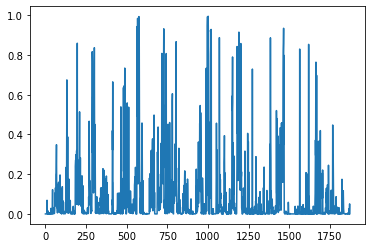

In [11]:
plt.plot(model.predict(X_Culex)[:,1])

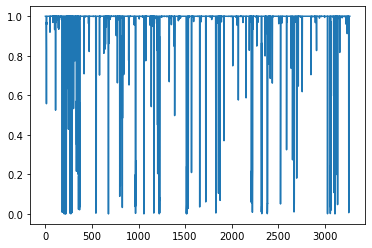

In [12]:
plt.plot(model.predict(X_Culex_rest)[:,1])